## Stage 1 : EDA - Exploratory Data Analysis

Import Library

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
# sklearn import for data pre-processing
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer, KNNImputer

# sklearn import for LogisticRegression and RandomForest algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# ignore warnings( not suggested for real-life projects)
import warnings
warnings.filterwarnings('ignore')

In [74]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 6
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

Load Data

In [75]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
! gdown --id 10mfT55mViLZohJc_GkGezx2uIovDOJrJ

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=10mfT55mViLZohJc_GkGezx2uIovDOJrJ
To: /content/Pencemar-Udara-di-Provinsi-DKI-Jakarta-2021.csv
100% 18.8k/18.8k [00:00<00:00, 56.3MB/s]


In [76]:
df = pd.read_csv('/content/Pencemar-Udara-di-Provinsi-DKI-Jakarta-2021.csv')
df.sample(5)

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
255,9/13/2021,56,88.0,52,9,27,21,88,PM25,SEDANG,DKI4
59,3/1/2021,62,97.0,45,13,38,18,97,PM25,SEDANG,DKI3
56,2/26/2021,48,75.0,43,13,40,20,75,PM25,SEDANG,DKI4
267,9/25/2021,55,102.0,52,11,50,20,102,PM25,TIDAK SEHAT,DKI4
116,4/27/2021,75,138.0,51,12,65,28,138,PM25,TIDAK SEHAT,DKI4


In [93]:
df.groupby("location")[["max","pm10","pm25","so2","co","o3","no2"]].mean()

,max,pm10,pm25,so2,co,o3,no2
location,,,,,,,
DKI1,74.000000,62.000000,74.000000,42.000000,19.000000,39.000000,49.000000
DKI2,76.961538,51.807692,78.031250,55.153846,17.384615,46.980769,46.096154
DKI3,84.218182,57.072727,81.022727,53.854545,17.181818,48.727273,36.272727
DKI4,100.628319,63.269912,100.092920,52.442478,14.181416,50.876106,30.862832
DKI5,92.612903,61.000000,92.612903,49.387097,17.580645,49.000000,33.419355


In [ ]:
a = df.groupby(['categori'])['location'].count().reset_index()
a

,categori,location
0,BAIK,3
1,SEDANG,223
2,TIDAK SEHAT,139


### 1. Descriptive Statistics

In [ ]:
df.sample(15)

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
286,10/14/2021,73,131.0,65,12,70,35,131,PM25,TIDAK SEHAT,DKI4
309,11/6/2021,57,86.0,52,13,52,40,86,PM25,SEDANG,DKI4
263,9/21/2021,61,99.0,52,11,58,36,99,PM25,SEDANG,DKI4
48,2/18/2021,53,70.0,44,13,41,29,70,PM25,SEDANG,DKI3
58,2/28/2021,68,113.0,40,18,60,18,113,PM25,TIDAK SEHAT,DKI4
250,9/8/2021,64,106.0,52,16,29,34,106,PM25,TIDAK SEHAT,DKI4
273,10/1/2021,58,91.0,59,11,65,38,91,PM25,SEDANG,DKI4
63,3/5/2021,65,81.0,54,16,59,30,81,PM25,SEDANG,DKI2
351,12/18/2021,51,69.0,42,18,54,32,69,PM25,SEDANG,DKI4
135,5/16/2021,54,92.0,50,9,52,16,92,PM25,SEDANG,DKI4


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   365 non-null    object 
 1   pm10      365 non-null    int64  
 2   pm25      334 non-null    float64
 3   so2       365 non-null    int64  
 4   co        365 non-null    int64  
 5   o3        365 non-null    int64  
 6   no2       365 non-null    int64  
 7   max       365 non-null    int64  
 8   critical  365 non-null    object 
 9   categori  365 non-null    object 
 10  location  365 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 31.5+ KB


Dataset ini berisi mengenai Indeks Standar Pencemar Udara (ISPU) yang diukur dari 5 stasiun pemantau kualitas udara (SPKU) yang ada di Provinsi DKI Jakarta Tahun 2021

Penjelasan variabel dari data diatas sebagai berikut :

1. tanggal : Tanggal pengukuran kualitas udara
2. stasiun : Lokasi pengukuran di stasiun
3. pm10 : Partikulat salah satu parameter yang diukur
4. pm25 : Partikulat salah satu parameter yang diukur
5. so2 : Sulfida (dalam bentuk SO2) salah satu parameter yang diukur
6. co : Carbon Monoksida salah satu parameter yand diukur
7. o3 : Ozon salah satu parameter yang diukur
8. no2 : NItrogen dioksida salah satu parameter yang diukur
9. max : Nilai ukur paling tinggi dari seluruh parameter yang diukur dalam waktu yang sama 10.
10. critical : Parameter yang hasil pengukurannya paling tinggi
11. categori : Kategori hasil perhitungan indeks standar pencemaran udara

In [ ]:
total_cat = df.shape[0]
a = df.groupby(['categori'])['critical'].count().reset_index()
a['Persentase(%)'] = a['critical']/total_cat*100
a

,categori,critical,Persentase(%)
0,BAIK,3,0.821918
1,SEDANG,223,61.095890
2,TIDAK SEHAT,139,38.082192


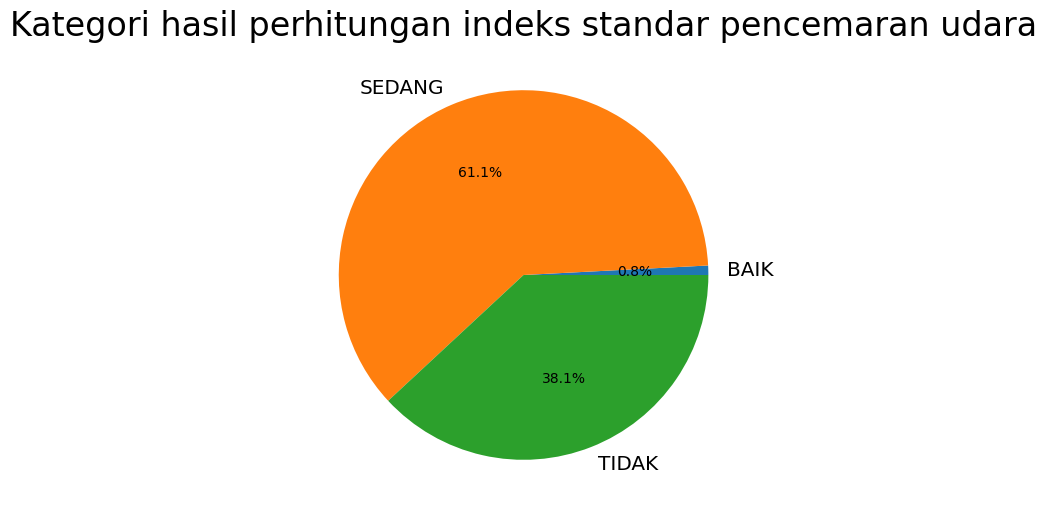

In [ ]:
a=['BAIK', 'SEDANG','TIDAK ']
T=[0.82, 61.09, 38.08]

plt.pie(T, labels= a,autopct= '%1.1f%%')
plt.title('Kategori hasil perhitungan indeks standar pencemaran udara', size = 24)
plt.show()

In [ ]:
df.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,1/1/2021,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,1/2/2021,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,1/3/2021,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,1/4/2021,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,1/5/2021,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3


Text(46.222222222222214, 0.5, 'count')

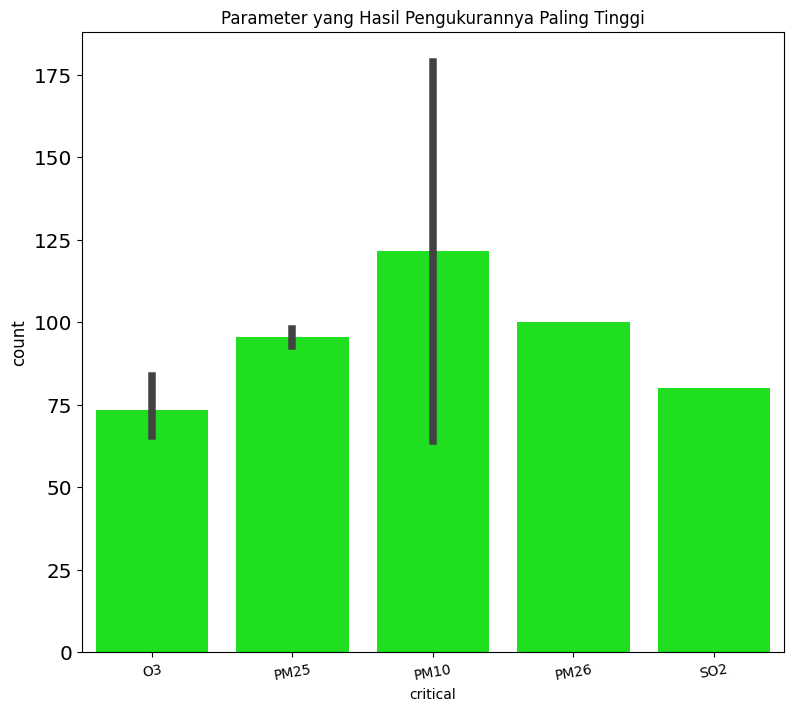

In [ ]:
plt.figure(figsize=(8,7))
sns.barplot(x = 'critical', y = 'max', data = df, color='lime', orient='v')
plt.xticks(fontsize=10, rotation=10)
plt.tight_layout()
plt.title("Parameter yang Hasil Pengukurannya Paling Tinggi")
plt.xlabel('critical', fontsize = 10)
plt.ylabel('count', fontsize = 12)

In [ ]:
print('Data yang duplikat = ', df.duplicated().sum())

Data yang duplikat =  0


Kolom yang memiliki Missing value

In [ ]:
df.isna().sum().sort_values(ascending=False)

pm25        31
tanggal      0
pm10         0
so2          0
co           0
o3           0
no2          0
max          0
critical     0
categori     0
location     0
dtype: int64

Pengamatan:
- Data terdiri dari 365 baris dan 11 kolom
- Terdapat missing values pada kolom `pm25` sebanyak 31 -> akan kita imputasi.
- Tidak ada duplicate data antar baris.
- Untuk tipe data `tanggal` seharusnya bertipe Date dan `pm5` seharusnya bertipe Int. Sepertinya tidak ada issue yang mencolok pada tipe data untuk setiap kolom ( Semua tipe data sudah sesuai selain 2 kolom tersebut)

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pm10,365.0,60.506849,15.155896,19.0,53.00,62.0,68.00,179.0
pm25,334.0,94.694611,24.153839,33.0,78.25,94.5,108.75,174.0
so2,365.0,52.753425,11.193823,37.0,45.00,52.0,55.00,126.0
co,365.0,15.391781,5.857975,7.0,11.00,14.0,18.00,47.0
o3,365.0,49.805479,12.234790,20.0,41.00,49.0,57.00,151.0
no2,365.0,34.115068,15.974152,9.0,24.00,31.0,39.00,134.0
max,365.0,94.030137,24.408647,45.0,77.00,93.0,108.00,179.0


In [ ]:
percentage_of_null_values = ((df.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

pm25        8.493151
tanggal     0.000000
pm10        0.000000
so2         0.000000
co          0.000000
o3          0.000000
no2         0.000000
max         0.000000
critical    0.000000
categori    0.000000
location    0.000000
dtype: float64

Untuk kolom/feature yang memiliki missing value, karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. atau opsi lain, digunakan nilai IQR (Q3-Q1) yang juga robust terhadap outlier.

##### STATISTICAL SUMMARY

Grouping by Data Variable Type (Pick + Separate Columns)

In [ ]:
# pengelompokan kolom berdasarkan jenisnya
nums = ['pm10','pm25', 'so2', 'co', 'o3','no2', 'max']
cats = ['tanggal', 'critical', 'categori', 'location']

##### A. DATA NUMERICAL

In [ ]:
df[nums].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pm10,365.0,60.506849,15.155896,19.0,53.00,62.0,68.00,179.0
pm25,334.0,94.694611,24.153839,33.0,78.25,94.5,108.75,174.0
so2,365.0,52.753425,11.193823,37.0,45.00,52.0,55.00,126.0
co,365.0,15.391781,5.857975,7.0,11.00,14.0,18.00,47.0
o3,365.0,49.805479,12.234790,20.0,41.00,49.0,57.00,151.0
no2,365.0,34.115068,15.974152,9.0,24.00,31.0,39.00,134.0
max,365.0,94.030137,24.408647,45.0,77.00,93.0,108.00,179.0


Beberapa kolom/feature sudah cukup simetrik distribusinya (mean dan median tidak terlalu jauh), namun ada beberapa kolom yang skew, dilihat dari nilai mean dan median ----> "mean>median" = skew ke kanan (akan kita lihat visualisasi nya di bawah) yaitu kolom `pm5`, `co`, `no2`,`max`

##### B. DATA CATEGORICAL

In [ ]:
df[cats].describe().transpose()

,count,unique,top,freq
tanggal,365,365,1/1/2021,1
critical,365,5,PM25,336
categori,365,3,SEDANG,223
location,365,5,DKI4,226


Values Counting

In [ ]:
for col in cats:
    print(f"Value count column {col}:")
    print(df[col].value_counts())
    print()

Value count column tanggal:
1/1/2021      1
9/9/2021      1
9/7/2021      1
9/6/2021      1
9/5/2021      1
             ..
5/1/2021      1
4/30/2021     1
4/29/2021     1
4/28/2021     1
12/31/2021    1
Name: tanggal, Length: 365, dtype: int64

Value count column critical:
PM25    336
O3       25
PM10      2
PM26      1
SO2       1
Name: critical, dtype: int64

Value count column categori:
SEDANG         223
TIDAK SEHAT    139
BAIK             3
Name: categori, dtype: int64

Value count column location:
DKI4    226
DKI3     55
DKI2     52
DKI5     31
DKI1      1
Name: location, dtype: int64



### 2. Univariate Analysis

In [ ]:
df1 = df.copy()

In [ ]:
df1['tanggal'] = pd.to_datetime(df1['tanggal'])
df1.head()

,tanggal,pm10,pm25,so2,co,o3,no2,max,critical,categori,location
0,2021-01-01,43,NaN,58,29,35,65,65,O3,SEDANG,DKI2
1,2021-01-02,58,NaN,86,38,64,80,86,PM25,SEDANG,DKI3
2,2021-01-03,64,NaN,93,25,62,86,93,PM25,SEDANG,DKI3
3,2021-01-04,50,NaN,67,24,31,77,77,O3,SEDANG,DKI2
4,2021-01-05,59,NaN,89,24,35,77,89,PM25,SEDANG,DKI3


In [ ]:
df1['bulan'] = df1['tanggal'].dt.month

In [ ]:
df1.drop(['tanggal'], axis=1, inplace=True)

In [ ]:
df1.describe()

,pm10,pm25,so2,co,o3,no2,max,bulan
count,365.000000,334.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,60.506849,94.694611,52.753425,15.391781,49.805479,34.115068,94.030137,6.526027
std,15.155896,24.153839,11.193823,5.857975,12.234790,15.974152,24.408647,3.452584
min,19.000000,33.000000,37.000000,7.000000,20.000000,9.000000,45.000000,1.000000
25%,53.000000,78.250000,45.000000,11.000000,41.000000,24.000000,77.000000,4.000000
50%,62.000000,94.500000,52.000000,14.000000,49.000000,31.000000,93.000000,7.000000
75%,68.000000,108.750000,55.000000,18.000000,57.000000,39.000000,108.000000,10.000000
max,179.000000,174.000000,126.000000,47.000000,151.000000,134.000000,179.000000,12.000000


In [ ]:
# pengelompokan kolom berdasarkan jenisnya
num = ['bulan', 'pm10','pm25', 'so2', 'co', 'o3','no2', 'max']
cat = ['critical', 'categori', 'location']

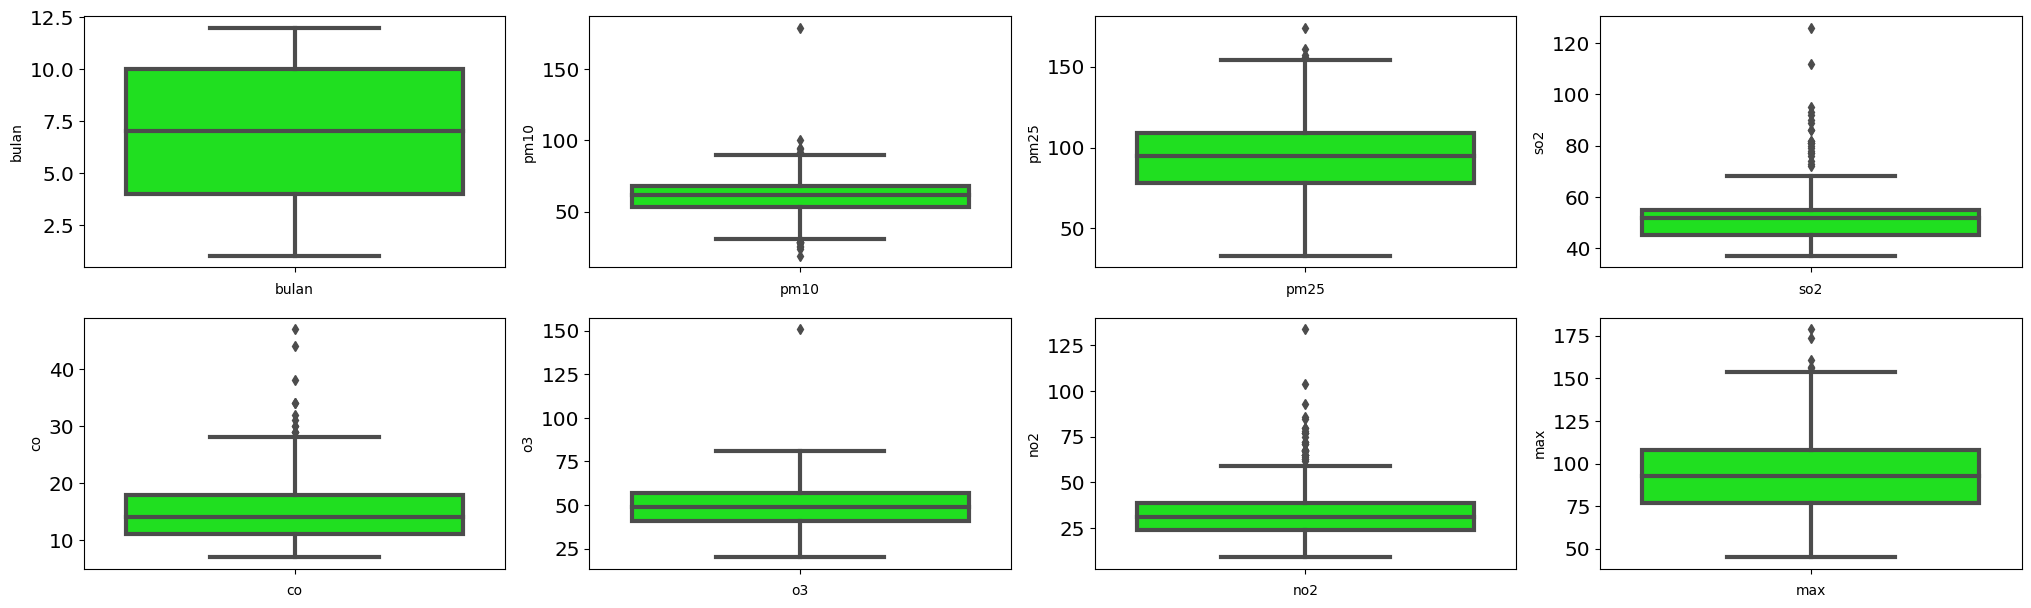

In [ ]:
plt.figure(figsize=(25,15))
features = num
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df1[features[i]], color='lime', orient='v')
    plt.xlabel(features[i])

Untuk boxplot, hal paling penting yang harus kita perhatikan adalah keberadaan outlier.
* Outlier terlihat utamanya pada kolom `pm10`, `o3`, dan `no2`
* Outlier yang tidak terlalu banyak ada pada kolom `pm25`, `s02`, `co`, dan `max`.

<b> Outlier ini nantinya dapat di "Handle" dengan Dua opsi, yaitu
1. Menghapus Outlier berdasarkan IQR
2. Menghapus Outlier berdasarkan Z-Score (untuk outlier yang ekstrim ----> pada data dengan sebaran/distribusi normal,, sekitar ~0,3%)

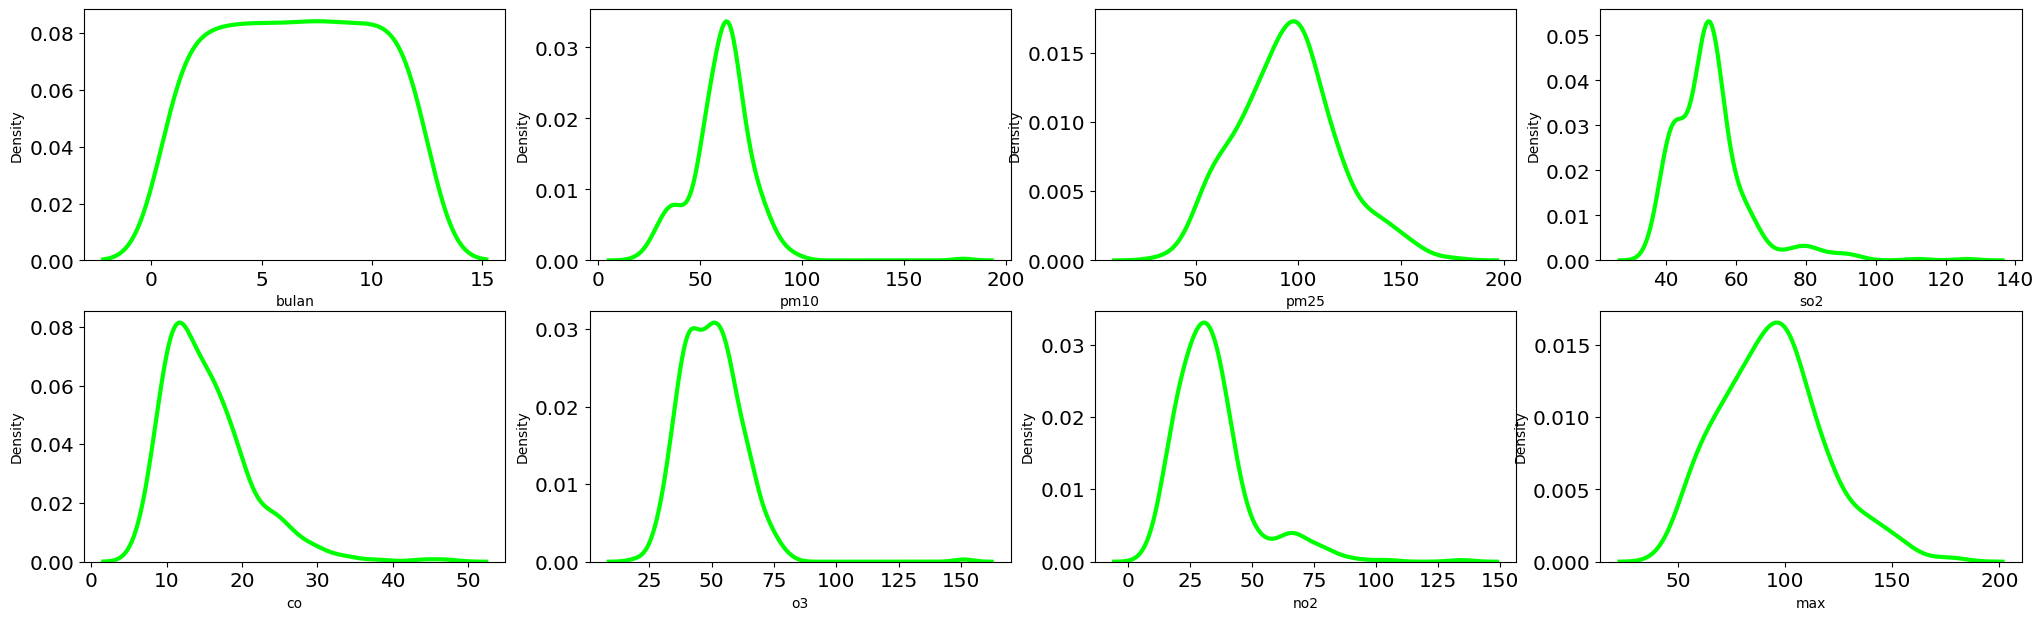

In [ ]:
features = num
plt.figure(figsize=(25, 15))
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df1[features[i]], color='lime')
    plt.xlabel(features[i])

Dapat diamati dari hasil viasualisasi feature yang menarik adalah
1.  `pm10`,`so2`,`co`,`o3`,`no2` skew ke kanan, ada ouutlier disisi kanan
2.  `bulan`,`pm25`,`max` sudah mendekati normal

<b> Untuk data dengan distribusi skew ke kanan, dapat diolah dengan "Feature Transformation", tepatnya dengan Log Transformation agar sebaran data menjadi normal.

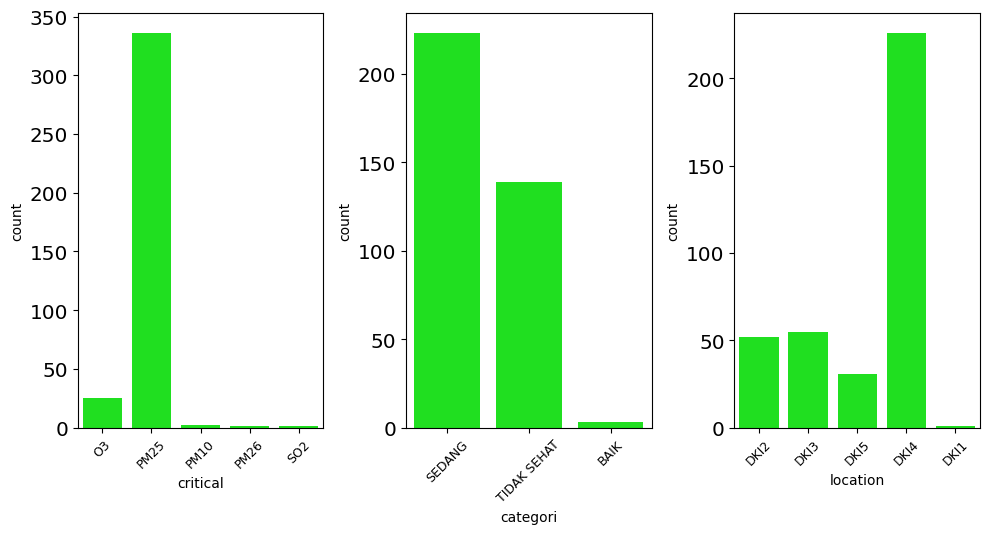

In [ ]:
plt.figure(figsize=(10,15))
for i in range(0, len(cat)):
    plt.subplot(3, 3, i+1)
    sns.countplot(x = df1[cat[i]], color='lime', orient='v')
    plt.xticks(fontsize=9, rotation=45)
    plt.tight_layout()

Note:
Dapat dianalisis dari visualisasi bahwa lokasi paling terdampak pencemaran adalah DKI 4, critical terbanyak adalah PM25, dan categori terbanyak yaitu Tidak Sehat.

### 3. Multivariate Analysis

In [ ]:
df1.corr()

,pm10,pm25,so2,co,o3,no2,max,bulan
pm10,1.000000,0.779663,0.311701,0.208080,0.239243,0.118544,0.873909,0.122627
pm25,0.779663,1.000000,0.454264,0.266070,0.171012,0.391858,0.950698,0.051899
so2,0.311701,0.454264,1.000000,0.420605,0.176856,0.632170,0.306520,-0.043195
co,0.208080,0.266070,0.420605,1.000000,0.009001,0.755262,0.157949,-0.311768
o3,0.239243,0.171012,0.176856,0.009001,1.000000,-0.022235,0.278586,-0.022935
no2,0.118544,0.391858,0.632170,0.755262,-0.022235,1.000000,0.124633,-0.299127
max,0.873909,0.950698,0.306520,0.157949,0.278586,0.124633,1.000000,0.145172
bulan,0.122627,0.051899,-0.043195,-0.311768,-0.022935,-0.299127,0.145172,1.000000


Text(0.5, 1.0, 'Korelasi')

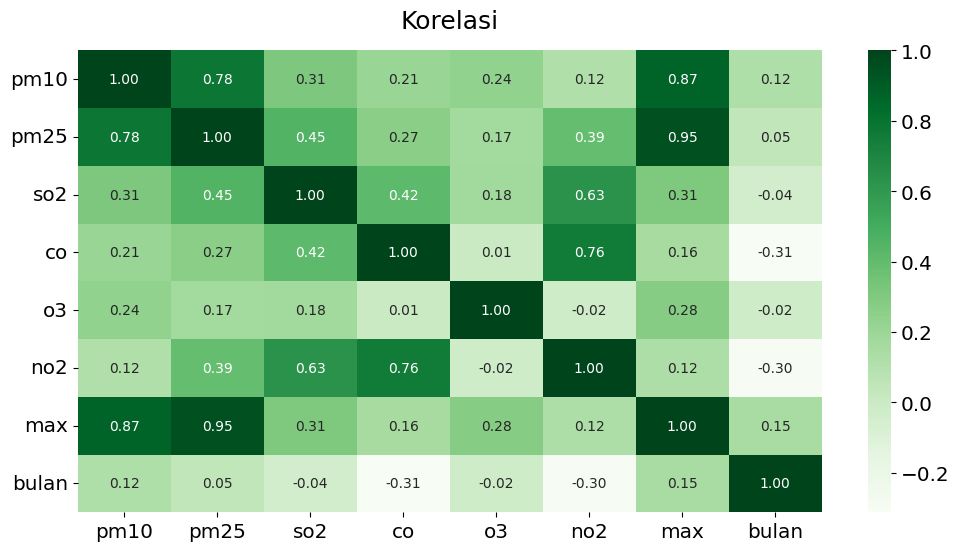

In [ ]:
#mask = np.triu(np.ones_like(df_stg1[nums].corr(), dtype=np.bool_))
heatmaps=sns.heatmap(df1.corr(),cmap='Greens', annot=True, fmt='.2f')
heatmaps.set_title('Korelasi', fontdict={'fontsize':18}, pad=16)

##### Dari correlation heatmap diatas, ada beberapa feature yang memilki korelasi kuat, yaitu :

1. `max` dan `pm10` : 0.87
2. `max` dan `pm25` : 0.95
3. `pm10` dan `pm25` : 0.78
4. `so2` dan `pm25` : 0.45
5. `no2` dan `so2` : 0.63
6. `co` dan `no2` : 0.76

- Note: ada kemungkinan redundan `max`,`pm10`,`pm25` jadi bisa dipilih salah satunya saja untuk training data

Korelasi lainnya:
1. Korelasi yang tinggi antara SO2 dan PM2.5 dapat menunjukkan beberapa hal berikut:

Hubungan Emisi: Tingginya korelasi antara SO2 dan PM2.5 dapat menunjukkan adanya hubungan dalam pola emisi kedua parameter tersebut. Mungkin terdapat sumber emisi yang sama, seperti industri, kendaraan bermotor, atau kegiatan pembakaran bahan bakar yang menyebabkan terjadinya peningkatan konsentrasi kedua polutan tersebut secara bersamaan.

Reaktivitas: Korelasi yang tinggi antara SO2 dan PM2.5 dapat menunjukkan bahwa SO2 berperan dalam pembentukan partikulat PM2.5. SO2 dapat bereaksi dengan bahan kimia lain di atmosfer dan membentuk partikel-partikel yang termasuk dalam kategori PM2.5.

Transportasi Udara: Korelasi yang tinggi antara SO2 dan PM2.5 dapat menunjukkan adanya transportasi udara yang signifikan dari sumber emisi SO2 ke daerah yang mengalami peningkatan konsentrasi PM2.5. Polutan SO2 yang dihasilkan dari sumber yang jauh dapat diangkut oleh angin dan kemudian bereaksi dengan komponen lain di atmosfer, membentuk partikel-partikel PM2.5 di lokasi yang lebih jauh.

Pola Pencemaran: Korelasi yang tinggi antara SO2 dan PM2.5 juga dapat menunjukkan adanya pola pencemaran udara yang serupa atau kondisi lingkungan yang serupa yang mempengaruhi konsentrasi kedua polutan tersebut secara bersamaan. Misalnya, pola cuaca atau pola sirkulasi udara tertentu dapat mengakibatkan peningkatan konsentrasi SO2 dan PM2.5 di suatu wilayah.

2. Korelasi yang tinggi antara NO2 dan SO2 dapat mengindikasikan beberapa hal berikut:

Emisi Sumber yang Sama: Tingginya korelasi antara NO2 dan SO2 dapat menunjukkan bahwa terdapat sumber emisi yang sama atau terkait erat. Misalnya, industri, pembangkit listrik, atau transportasi dapat menjadi sumber utama emisi kedua polutan tersebut. Jika ada aktivitas yang menghasilkan emisi NO2 yang tinggi, maka kemungkinan besar akan ada emisi SO2 yang signifikan dari sumber yang sama.

Reaksi Kimia: Korelasi yang tinggi antara NO2 dan SO2 juga dapat menunjukkan adanya interaksi kimia di udara. Baik NO2 maupun SO2 dapat terlibat dalam reaksi kimia di atmosfer dan membentuk senyawa-senyawa baru, termasuk partikel-partikel kecil seperti partikulat PM2.5. Reaksi kimia ini dapat menyebabkan peningkatan konsentrasi kedua polutan secara bersamaan.

Transportasi Udara: Korelasi tinggi antara NO2 dan SO2 juga dapat menunjukkan adanya transportasi udara dari sumber emisi NO2 ke lokasi yang mengalami peningkatan konsentrasi SO2, atau sebaliknya. Polutan NO2 dan SO2 dapat diangkut oleh angin dan tersebar ke wilayah yang lebih luas. Oleh karena itu, peningkatan konsentrasi NO2 di suatu daerah dapat diikuti oleh peningkatan konsentrasi SO2 di wilayah tersebut.

Pola Pencemaran: Korelasi yang tinggi antara NO2 dan SO2 juga dapat mencerminkan pola pencemaran udara yang serupa atau kondisi lingkungan yang serupa. Misalnya, pola cuaca atau pola sirkulasi udara tertentu dapat menyebabkan peningkatan konsentrasi NO2 dan SO2 di suatu wilayah.

3. Korelasi yang tinggi antara NO2 dan CO dapat mengindikasikan beberapa hal berikut:

Emisi dari Sumber yang Sama: Tingginya korelasi antara NO2 dan CO dapat menunjukkan bahwa ada sumber emisi yang sama atau terkait erat. Misalnya, kendaraan bermotor atau industri dapat menjadi sumber utama emisi kedua polutan tersebut. Jika terdapat emisi NO2 yang tinggi dari sumber yang sama, kemungkinan besar juga akan ada emisi CO yang signifikan dari sumber tersebut.

Pola Emisi dan Kondisi Lingkungan: Korelasi tinggi antara NO2 dan CO juga dapat mencerminkan pola emisi dan kondisi lingkungan tertentu. Misalnya, di daerah dengan lalu lintas kendaraan yang padat, terutama saat kemacetan lalu lintas, konsentrasi NO2 dan CO bisa meningkat bersamaan karena emisi dari kendaraan bermotor. Pola emisi seperti ini dan kondisi lingkungan yang terkait, seperti cuaca stagnan atau kurangnya dispersi

### <b> 4. Insight

## Stage 2 : DATA PRE-PROCESSING

### 1. Data Cleansing

GENERAL INFORMATION

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      365 non-null    int64  
 1   pm25      334 non-null    float64
 2   so2       365 non-null    int64  
 3   co        365 non-null    int64  
 4   o3        365 non-null    int64  
 5   no2       365 non-null    int64  
 6   max       365 non-null    int64  
 7   critical  365 non-null    object 
 8   categori  365 non-null    object 
 9   location  365 non-null    object 
 10  bulan     365 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 31.5+ KB


In [ ]:
df1[cat].describe().transpose()

,count,unique,top,freq
critical,365,5,PM25,336
categori,365,3,SEDANG,223
location,365,5,DKI4,226


#### A. Handling Missing Values

Kita cek terlebih dahulu jumlah missing value pada dataset kita, dalam jumlah dan dalam persen.

In [ ]:
# jumlah entry NULL di setiap kolom
df1.isna().sum()

pm10         0
pm25        31
so2          0
co           0
o3           0
no2          0
max          0
critical     0
categori     0
location     0
bulan        0
dtype: int64

In [ ]:
percentage_of_null_values = ((df1.isnull().sum())*100/len(df)).sort_values(ascending = False)
percentage_of_null_values

pm25        8.493151
pm10        0.000000
so2         0.000000
co          0.000000
o3          0.000000
no2         0.000000
max         0.000000
critical    0.000000
categori    0.000000
location    0.000000
bulan       0.000000
dtype: float64

<b> Note :
* Untuk kolom/feature yang memiliki missing value, karena nilai null > 5% data, maka akan dilakukan imputation berdasarkan sebaran/distribusi datanya. jika data skew ke kanan (mean>median), maka digunakan nilai median karena nilai median robust terhadap outlier. jika mean< median, digunakan nilai mean.
* ada opsi lain untuk proses imputation ini, yaitu menggunakan nilai IQR (Q3-Q1) yang juga robust terhadap outlier. dalam case ini, kami hanya menggunakan nilai median dan mean saja.

Berikut adalah strategi kita mengatasi missing values pada setiap kolom.
<br>
INGAT: jikalau kita melakukan imputasi, maka itu mencerminkan ASUMSI kita.
* `pm25` \: impute dengan nilai median (dari `df.describe` kita tau distribusinya mendekati skewed ke kanan)

PROSES IMPUTASI

In [ ]:
# Impute kolom pm25 dengan median
df1['pm25'].fillna(df1['pm25'].median(), inplace=True)

Dicek kembali missing value setelah proses imputation

In [ ]:
df1.isna().sum()

pm10        0
pm25        0
so2         0
co          0
o3          0
no2         0
max         0
critical    0
categori    0
location    0
bulan       0
dtype: int64

In [ ]:
df1['pm25'] = df1['pm25'].astype(int)

Setelah dilakukan imputation, statistik deskriptif berubah, kita cek ulang

In [ ]:
df1[num].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
bulan,365.0,6.526027,3.452584,1.0,4.0,7.0,10.0,12.0
pm10,365.0,60.506849,15.155896,19.0,53.0,62.0,68.0,179.0
pm25,365.0,94.635616,23.103240,33.0,81.0,94.0,106.0,174.0
so2,365.0,52.753425,11.193823,37.0,45.0,52.0,55.0,126.0
co,365.0,15.391781,5.857975,7.0,11.0,14.0,18.0,47.0
o3,365.0,49.805479,12.234790,20.0,41.0,49.0,57.0,151.0
no2,365.0,34.115068,15.974152,9.0,24.0,31.0,39.0,134.0
max,365.0,94.030137,24.408647,45.0,77.0,93.0,108.0,179.0


Deskriptif statistik setelah proses imputasi tidak berubah secara signifikan. data setelah imputasi relatif masih mendekati nilai originalnya sebelum imputasi.

#### B. Duplicated Data

In [ ]:
# cek jumlah duplicated rows
# dari semua kolom
print('Jumlah data yang duplikat adalah :', df1.duplicated().sum())

Jumlah data yang duplikat adalah : 0


Karena tidak ada data yang duplikat, maka selanjutnya dilakukan handling outliers

#### C. Outliers Handling

Menggunakan IQR

In [ ]:
df2 = df1.copy()

In [ ]:
# Mendefinisikan kolom yang akan digunakan
cols = ['pm10','pm25', 'so2', 'co', 'o3', 'no2','max']

# Menghitung IQR untuk setiap kolom
Q1 = df2[cols].quantile(0.25)
Q3 = df2[cols].quantile(0.75)
IQR = Q3 - Q1

# Menentukan batas atas dan batas bawah
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menangani outlier dalam setiap kolom
for col in cols:
    df2[col] = df2[col].mask(df2[col] < lower_bound[col], lower_bound[col])
    df2[col] = df2[col].mask(df2[col] > upper_bound[col], upper_bound[col])

In [ ]:
print('Jumlah baris sebelum memfilter outlier :', len(df1))
print('Jumlah baris setelah memfilter outlier :', len(df2))

Jumlah baris sebelum memfilter outlier : 365
Jumlah baris setelah memfilter outlier : 365


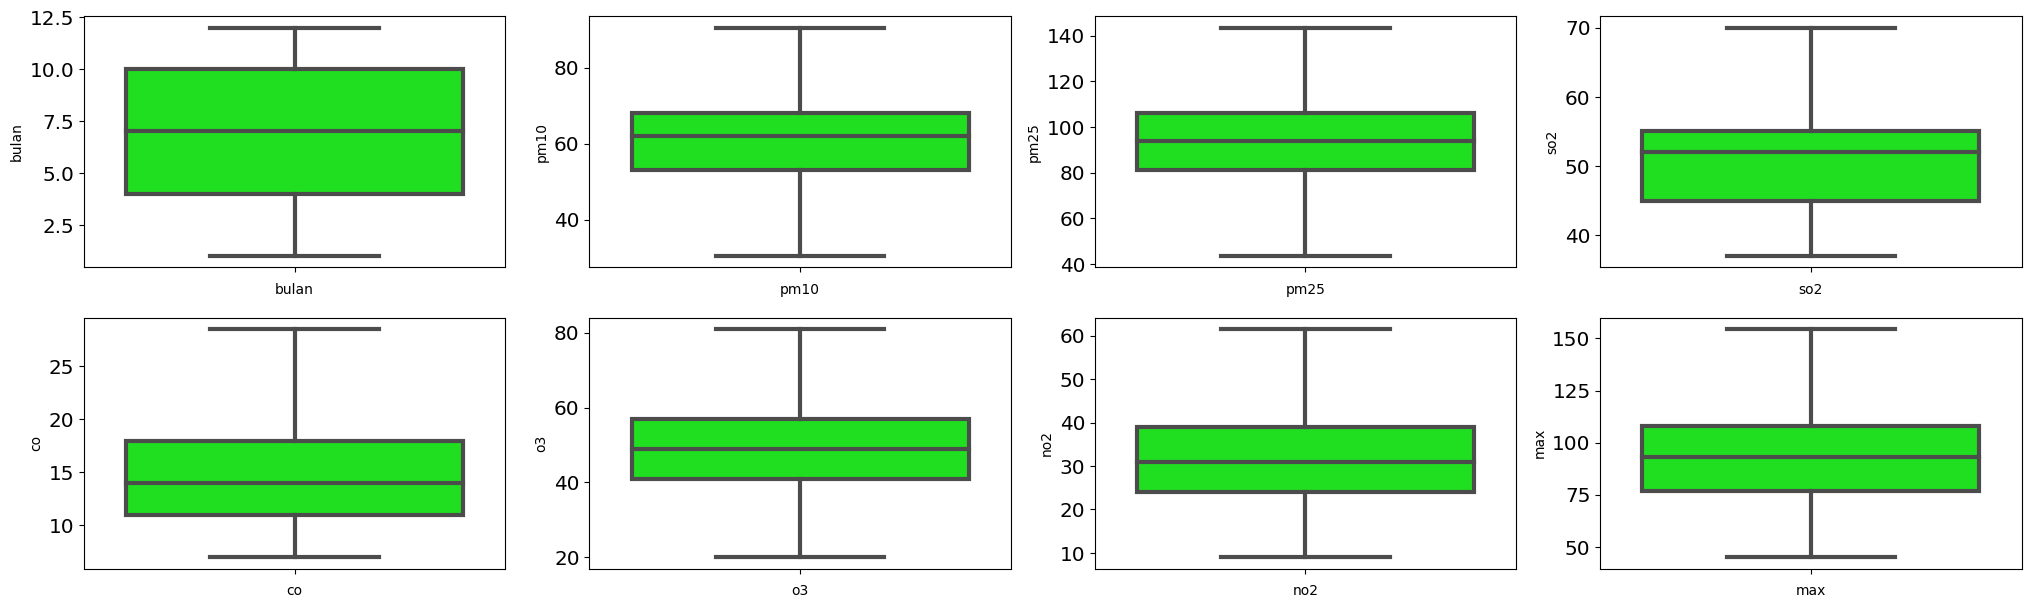

In [ ]:
plt.figure(figsize=(25,15))
features = num
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.boxplot(y=df2[features[i]], color='lime', orient='v')
    plt.xlabel(features[i])

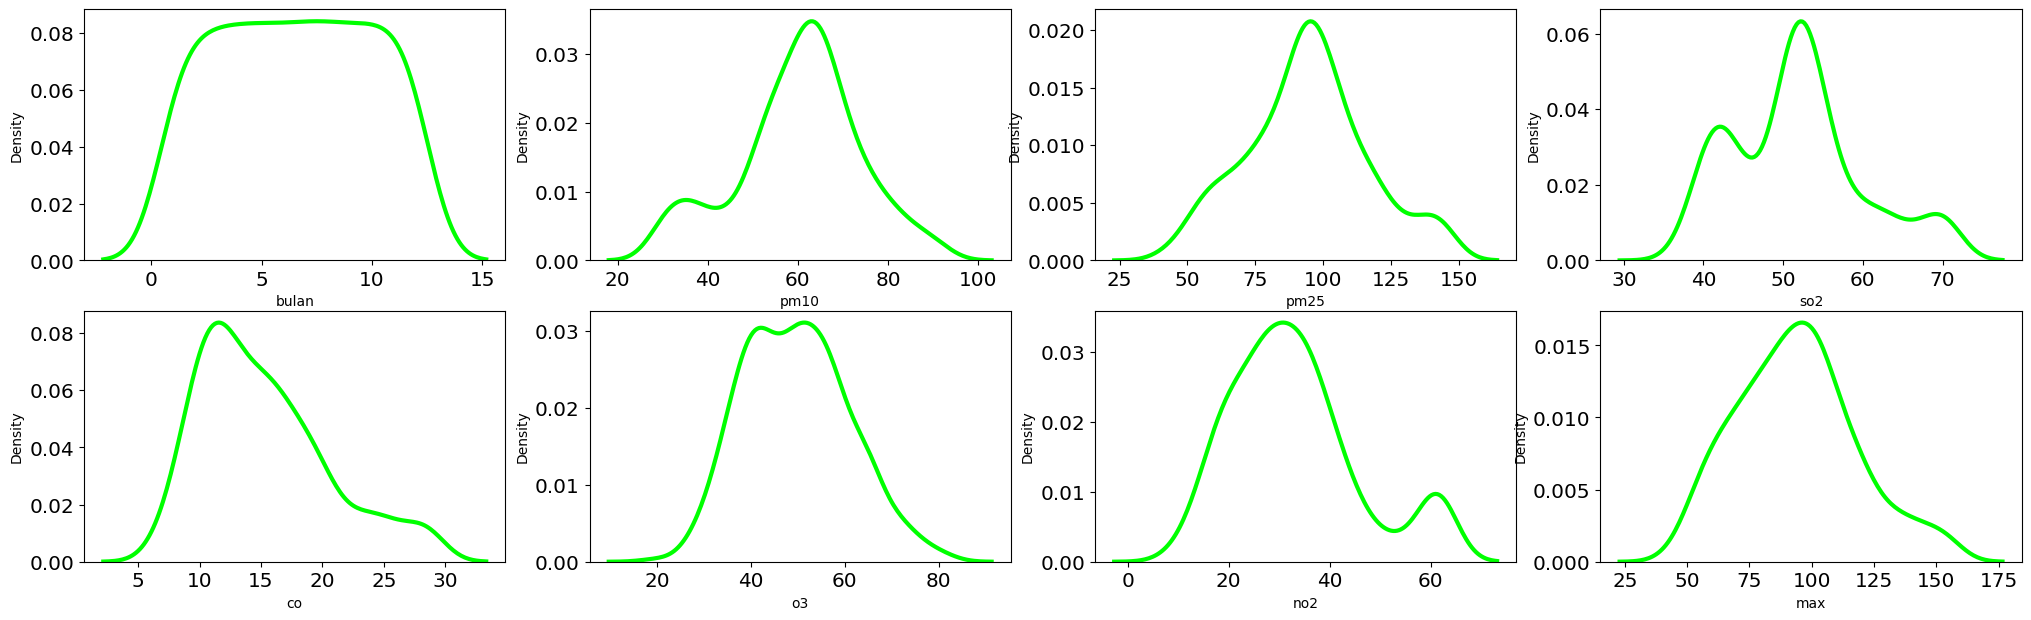

In [ ]:
features = num
plt.figure(figsize=(25, 15))
for i in range(0, len(features)):
    plt.subplot(4, 4, i+1)
    sns.kdeplot(x=df2[features[i]], color='lime')
    plt.xlabel(features[i])

#### D. Feature Transformation

###### NORMALIZATION/STANDARIZATION

In [ ]:
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pm10,365.0,60.321918,13.520987,30.5,53.0,62.0,68.0,90.5
pm25,365.0,94.349315,22.235547,43.5,81.0,94.0,106.0,143.5
so2,365.0,51.789041,8.163635,37.0,45.0,52.0,55.0,70.0
co,365.0,15.213699,5.246226,7.0,11.0,14.0,18.0,28.5
o3,365.0,49.613699,11.144226,20.0,41.0,49.0,57.0,81.0
no2,365.0,32.998630,12.661240,9.0,24.0,31.0,39.0,61.5
max,365.0,93.880822,23.975380,45.0,77.0,93.0,108.0,154.5
bulan,365.0,6.526027,3.452584,1.0,4.0,7.0,10.0,12.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 'pm10','pm25', 'so2', 'co', 'o3', 'no2','max' kita standarisasi (karena distribusi datanya sudah mendekati normal)
df2['std_pm10'] = StandardScaler().fit_transform(df2['pm10'].values.reshape(len(df2), 1))
df2['std_pm25'] = StandardScaler().fit_transform(df2['pm25'].values.reshape(len(df2), 1))
df2['std_so2'] = StandardScaler().fit_transform(df2['so2'].values.reshape(len(df2), 1))
df2['std_co'] = StandardScaler().fit_transform(df2['co'].values.reshape(len(df2), 1))
df2['std_o3'] = StandardScaler().fit_transform(df2['o3'].values.reshape(len(df2), 1))
df2['std_no2'] = StandardScaler().fit_transform(df2['no2'].values.reshape(len(df2), 1))
df2['std_max'] = StandardScaler().fit_transform(df2['max'].values.reshape(len(df2), 1))

df2

,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,bulan,std_pm10,std_pm25,std_so2,std_co,std_o3,std_no2,std_max
0,43.0,94.0,58,28.5,35,61.5,65.0,O3,SEDANG,DKI2,1,-1.282872,-0.015731,0.761852,2.536021,-1.313125,2.254163,-1.206257
1,58.0,94.0,70,28.5,64,61.5,86.0,PM25,SEDANG,DKI3,1,-0.171963,-0.015731,2.233804,2.536021,1.292692,2.254163,-0.329156
2,64.0,94.0,70,25.0,62,61.5,93.0,PM25,SEDANG,DKI3,1,0.272401,-0.015731,2.233804,1.867959,1.112980,2.254163,-0.036789
3,50.0,94.0,67,24.0,31,61.5,77.0,O3,SEDANG,DKI2,1,-0.764448,-0.015731,1.865816,1.677084,-1.672548,2.254163,-0.705056
4,59.0,94.0,70,24.0,35,61.5,89.0,PM25,SEDANG,DKI3,1,-0.097902,-0.015731,2.233804,1.677084,-1.313125,2.254163,-0.203856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,75.0,121.0,61,23.0,40,47.0,121.0,PM25,TIDAK SEHAT,DKI4,12,1.087068,1.200207,1.129840,1.486209,-0.863846,1.107363,1.132679
361,59.0,89.0,53,16.0,34,33.0,89.0,PM25,SEDANG,DKI4,12,-0.097902,-0.240905,0.148539,0.150085,-1.402980,0.000108,-0.203856
362,61.0,98.0,54,15.0,37,29.0,98.0,PM25,SEDANG,DKI4,12,0.050219,0.164408,0.271202,-0.040790,-1.133413,-0.316250,0.172045
363,60.0,102.0,53,17.0,38,44.0,102.0,PM25,TIDAK SEHAT,DKI4,12,-0.023841,0.344547,0.148539,0.340960,-1.043558,0.870094,0.339111


<b>Feature Standarisasi digunakan dalam feature transformation karena :</b>

Feature ini dapat merubah bentuk sebaran menjadi mendekati distribusi normal
Range ketika standarisasi tidak terlalu loose dan nilainya adalah real. Tidak seperti log transformation yang memungkinkan nilainya NaN dan Infinity (karena value dari feature). jadi, log transformation tidak disarankan pada case ini.

In [ ]:
# cek keberhasilan feature transformation
df2.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
pm10,365.0,6.032192e+01,13.520987,30.500000,53.000000,62.000000,68.000000,90.500000
pm25,365.0,9.434932e+01,22.235547,43.500000,81.000000,94.000000,106.000000,143.500000
so2,365.0,5.178904e+01,8.163635,37.000000,45.000000,52.000000,55.000000,70.000000
co,365.0,1.521370e+01,5.246226,7.000000,11.000000,14.000000,18.000000,28.500000
o3,365.0,4.961370e+01,11.144226,20.000000,41.000000,49.000000,57.000000,81.000000
no2,365.0,3.299863e+01,12.661240,9.000000,24.000000,31.000000,39.000000,61.500000
max,365.0,9.388082e+01,23.975380,45.000000,77.000000,93.000000,108.000000,154.500000
bulan,365.0,6.526027e+00,3.452584,1.000000,4.000000,7.000000,10.000000,12.000000
std_pm10,365.0,1.654689e-16,1.001373,-2.208630,-0.542266,0.124280,0.568644,2.235007
std_pm25,365.0,-1.752023e-16,1.001373,-2.289987,-0.601183,-0.015731,0.524686,2.213490


In [ ]:
nums_transform = ['std_pm10','std_pm25','std_so2','std_co','std_o3','std_no2','std_max']

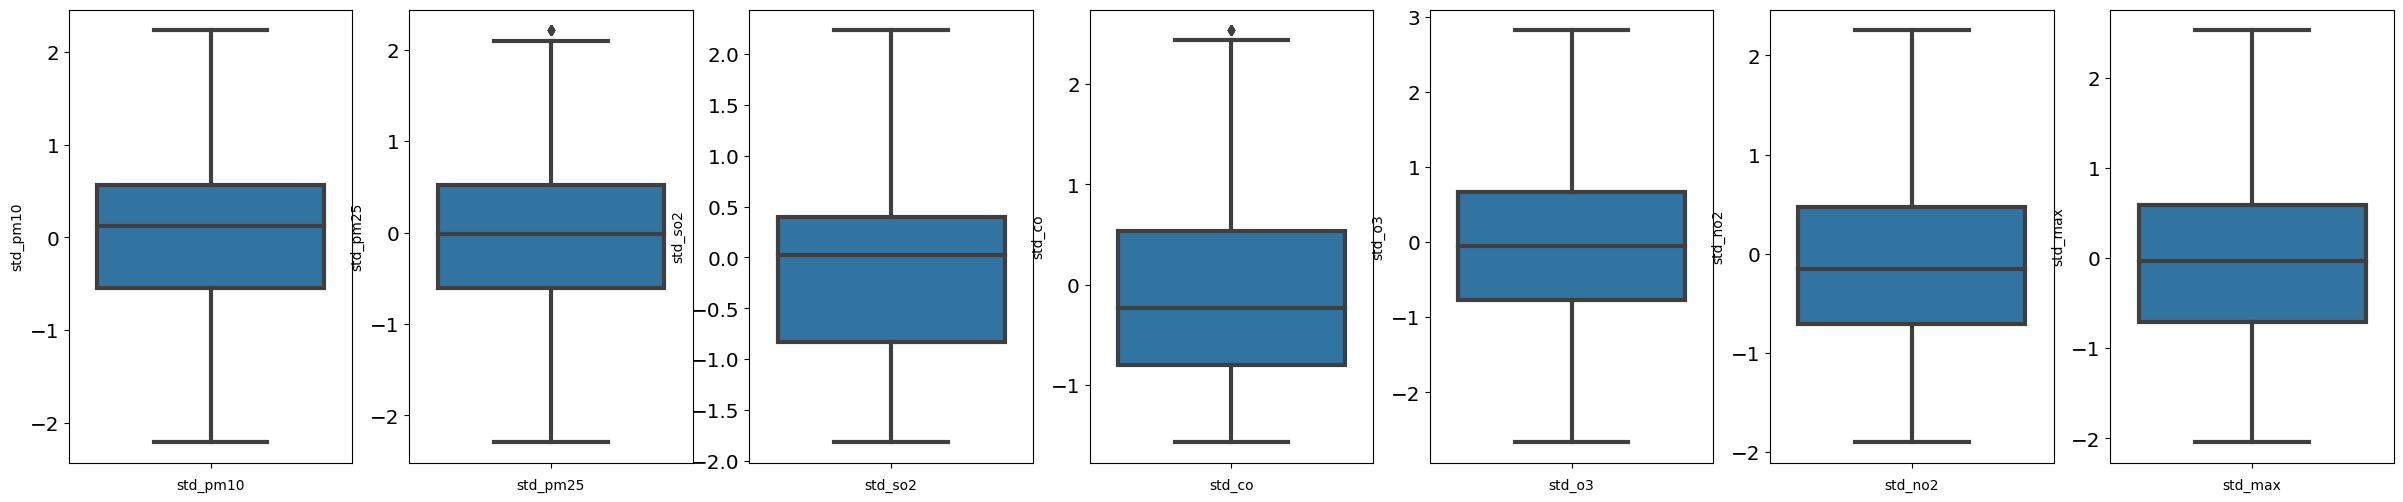

In [ ]:
plt.figure(figsize=(30,20))
features = nums_transform
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.boxplot(y=df2[features[i]], orient='v')
    plt.xlabel(features[i])

Note :

Jika dilihat dari distribusi data setelah standarisasi, range/point antar value tidak terlalu ekstrim, atau masih dapat ditolerir maka data ini sudah aman untuk dilakukan proses selanjutnya

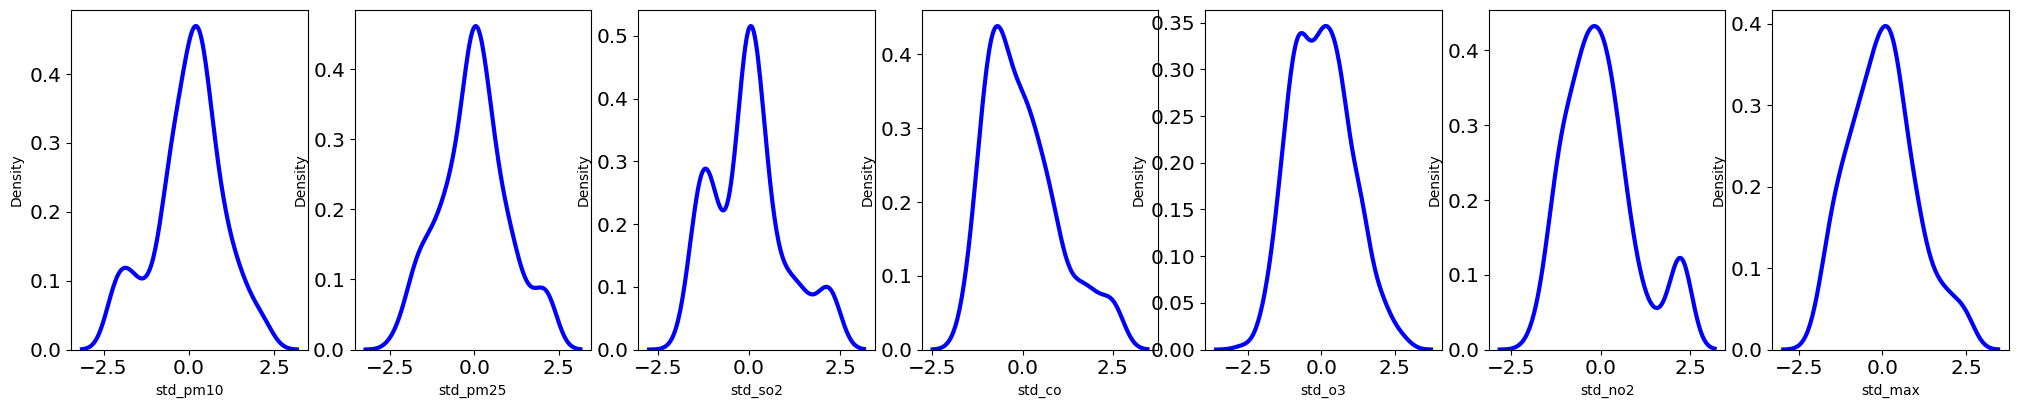

In [ ]:
features = nums_transform
plt.figure(figsize=(25, 15))
for i in range(0, len(features)):
    plt.subplot(3, 7, i+1)
    sns.kdeplot(x=df2[features[i]], color='blue')
    plt.xlabel(features[i])

#### E. FEATURE ENCODING

In [ ]:
df2.head()

,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,bulan,std_pm10,std_pm25,std_so2,std_co,std_o3,std_no2,std_max
0,43.0,94.0,58,28.5,35,61.5,65.0,O3,SEDANG,DKI2,1,-1.282872,-0.015731,0.761852,2.536021,-1.313125,2.254163,-1.206257
1,58.0,94.0,70,28.5,64,61.5,86.0,PM25,SEDANG,DKI3,1,-0.171963,-0.015731,2.233804,2.536021,1.292692,2.254163,-0.329156
2,64.0,94.0,70,25.0,62,61.5,93.0,PM25,SEDANG,DKI3,1,0.272401,-0.015731,2.233804,1.867959,1.112980,2.254163,-0.036789
3,50.0,94.0,67,24.0,31,61.5,77.0,O3,SEDANG,DKI2,1,-0.764448,-0.015731,1.865816,1.677084,-1.672548,2.254163,-0.705056
4,59.0,94.0,70,24.0,35,61.5,89.0,PM25,SEDANG,DKI3,1,-0.097902,-0.015731,2.233804,1.677084,-1.313125,2.254163,-0.203856


In [ ]:
for col in cat:
  print(f'value counts of column {col}')
  print(df2[col].value_counts())
  print('---'*10, '\n')

value counts of column critical
PM25    336
O3       25
PM10      2
PM26      1
SO2       1
Name: critical, dtype: int64
------------------------------ 

value counts of column categori
SEDANG         223
TIDAK SEHAT    139
BAIK             3
Name: categori, dtype: int64
------------------------------ 

value counts of column location
DKI4    226
DKI3     55
DKI2     52
DKI5     31
DKI1      1
Name: location, dtype: int64
------------------------------ 



In [ ]:
df_x = df2.copy()

In [ ]:
df_x['cats'] = df['categori'].map({'BAIK': 0, 'SEDANG': 0, 'TIDAK SEHAT': 1})
df_x

,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,bulan,std_pm10,std_pm25,std_so2,std_co,std_o3,std_no2,std_max,cats
0,43.0,94.0,58,28.5,35,61.5,65.0,O3,SEDANG,DKI2,1,-1.282872,-0.015731,0.761852,2.536021,-1.313125,2.254163,-1.206257,0
1,58.0,94.0,70,28.5,64,61.5,86.0,PM25,SEDANG,DKI3,1,-0.171963,-0.015731,2.233804,2.536021,1.292692,2.254163,-0.329156,0
2,64.0,94.0,70,25.0,62,61.5,93.0,PM25,SEDANG,DKI3,1,0.272401,-0.015731,2.233804,1.867959,1.112980,2.254163,-0.036789,0
3,50.0,94.0,67,24.0,31,61.5,77.0,O3,SEDANG,DKI2,1,-0.764448,-0.015731,1.865816,1.677084,-1.672548,2.254163,-0.705056,0
4,59.0,94.0,70,24.0,35,61.5,89.0,PM25,SEDANG,DKI3,1,-0.097902,-0.015731,2.233804,1.677084,-1.313125,2.254163,-0.203856,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,75.0,121.0,61,23.0,40,47.0,121.0,PM25,TIDAK SEHAT,DKI4,12,1.087068,1.200207,1.129840,1.486209,-0.863846,1.107363,1.132679,1
361,59.0,89.0,53,16.0,34,33.0,89.0,PM25,SEDANG,DKI4,12,-0.097902,-0.240905,0.148539,0.150085,-1.402980,0.000108,-0.203856,0
362,61.0,98.0,54,15.0,37,29.0,98.0,PM25,SEDANG,DKI4,12,0.050219,0.164408,0.271202,-0.040790,-1.133413,-0.316250,0.172045,0
363,60.0,102.0,53,17.0,38,44.0,102.0,PM25,TIDAK SEHAT,DKI4,12,-0.023841,0.344547,0.148539,0.340960,-1.043558,0.870094,0.339111,1


In [ ]:
# Frecuency Encoding
FE_critical = df_x.groupby('critical').size()/len(df_x)
df_x.loc[:,'critical_FE'] = df_x['critical'].map(FE_critical)

FE_location = df_x.groupby('location').size()/len(df_x)
df_x.loc[:,'location_FE'] = df_x['location'].map(FE_location)

#### F. HANDLE CLASS IMBALANCE

In [ ]:
df3 = df_x.copy()

In [ ]:
df3['cats'].value_counts()

0    226
1    139
Name: cats, dtype: int64

In [ ]:
# pembuatan binary label target yang imbalance (sebagai contoh)
df3['categori_class'] = df3['cats'] > 0.8
df3['categori_class'].value_counts()

False    226
True     139
Name: categori_class, dtype: int64

In [ ]:
# pemisahan features vs target
X = df3[[col for col in df3.columns if (str(df3[col].dtype) != 'object') and col not in ['cats', 'categori_class']]]
y = df3['categori_class'].values
print(X.shape)
print(y.shape)

(365, 17)
(365,)


In [ ]:
#Splitting the data into Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X, y)


In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    226
True     139
dtype: int64


UNDERSAMPLING
False    139
True     139
dtype: int64


OVERSAMPLING
False    226
True     226
dtype: int64


SMOTE
False    226
True     226
dtype: int64


### 2. Feature Engineering

##### <b>A. Feature selection (membuang feature yang kurang relevan atau redundan)

Drop kolom-kolom yang outdated

In [ ]:
df4 = df3.copy()

In [ ]:
df4.head()

,pm10,pm25,so2,co,o3,no2,max,critical,categori,location,...,std_pm25,std_so2,std_co,std_o3,std_no2,std_max,cats,critical_FE,location_FE,categori_class
0,43.0,94.0,58,28.5,35,61.5,65.0,O3,SEDANG,DKI2,...,-0.015731,0.761852,2.536021,-1.313125,2.254163,-1.206257,0,0.068493,0.142466,False
1,58.0,94.0,70,28.5,64,61.5,86.0,PM25,SEDANG,DKI3,...,-0.015731,2.233804,2.536021,1.292692,2.254163,-0.329156,0,0.920548,0.150685,False
2,64.0,94.0,70,25.0,62,61.5,93.0,PM25,SEDANG,DKI3,...,-0.015731,2.233804,1.867959,1.112980,2.254163,-0.036789,0,0.920548,0.150685,False
3,50.0,94.0,67,24.0,31,61.5,77.0,O3,SEDANG,DKI2,...,-0.015731,1.865816,1.677084,-1.672548,2.254163,-0.705056,0,0.068493,0.142466,False
4,59.0,94.0,70,24.0,35,61.5,89.0,PM25,SEDANG,DKI3,...,-0.015731,2.233804,1.677084,-1.313125,2.254163,-0.203856,0,0.920548,0.150685,False


In [ ]:
# drop kolom2 yang asli (karena sudah di-encoding)
df4 = df4.drop(columns=['critical', 'location','bulan','std_pm10'])

In [ ]:
# drop kolom2 berikut (karena sudah dilakukan Feature Transformation)
df4= df4.drop(columns=['pm10', 'pm25','so2','co', 'o3','no2', 'max'])

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pm10            365 non-null    float64
 1   pm25            365 non-null    float64
 2   so2             365 non-null    int64  
 3   co              365 non-null    float64
 4   o3              365 non-null    int64  
 5   no2             365 non-null    float64
 6   max             365 non-null    float64
 7   critical        365 non-null    object 
 8   categori        365 non-null    object 
 9   location        365 non-null    object 
 10  bulan           365 non-null    int64  
 11  std_pm10        365 non-null    float64
 12  std_pm25        365 non-null    float64
 13  std_so2         365 non-null    float64
 14  std_co          365 non-null    float64
 15  std_o3          365 non-null    float64
 16  std_no2         365 non-null    float64
 17  std_max         365 non-null    flo

## Stage 3 - MODELLING

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))

    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

#### CLASSIFICATION

In [ ]:
df_model = df4.copy()

In [ ]:
# pemisahan features vs target
X = df_model[[col for col in df_model.columns if (str(df_model[col].dtype) != 'object') and col not in ['cats', 'categori_class']]]
y = df_model['categori_class'].values
print(X.shape)
print(y.shape)

(365, 8)
(365,)


In [ ]:
#Splitting the data into Train & Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 42)

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_under, y_under = rus.fit_resample(X, y)

In [ ]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_over, y_over = ros.fit_resample(X, y)


In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_over_SMOTE, y_over_SMOTE = smote.fit_resample(X, y)


In [ ]:
print('Original')
print(pd.Series(y).value_counts())
print('\n')
print('UNDERSAMPLING')
print(pd.Series(y_under).value_counts())
print('\n')
print('OVERSAMPLING')
print(pd.Series(y_over).value_counts())
print('\n')
print('SMOTE')
print(pd.Series(y_over_SMOTE).value_counts())

Original
False    226
True     139
dtype: int64


UNDERSAMPLING
False    139
True     139
dtype: int64


OVERSAMPLING
False    226
True     226
dtype: int64


SMOTE
False    226
True     226
dtype: int64


##### A. Logistic Regression

In [ ]:
#inisialisasi object logistic regression
model = LogisticRegression(random_state=42)

#fitting model logistic regression
model.fit(X_over_SMOTE, y_over_SMOTE)

LogisticRegression(random_state=42)

Prediction Result (in data test)

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([ True, False, False, False, False,  True,  True, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True, False,
       False,  True, False, False,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False, False,  True, False,
        True, False, False, False, False,  True, False, False, False,
        True, False,  True, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True, False, False, False,
       False, False,  True,  True,  True, False, False, False, False,
        True, False,  True,  True, False, False, False, False,  True,
        True, False, False, False,  True,  True, False, False, False,
        True,  True, False, False,  True,  True,  True, False,  True,
        True, False])

In [ ]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

1.0

In [ ]:
y_pred_proba = model.predict_proba(X_test)
y_pred_proba

array([[1.20588220e-03, 9.98794118e-01],
       [9.99999938e-01, 6.19933974e-08],
       [9.43591874e-01, 5.64081259e-02],
       [9.93233555e-01, 6.76644530e-03],
       [8.55878847e-01, 1.44121153e-01],
       [3.26728755e-07, 9.99999673e-01],
       [1.29152552e-04, 9.99870847e-01],
       [9.64156840e-01, 3.58431597e-02],
       [4.46045594e-01, 5.53954406e-01],
       [2.53521184e-03, 9.97464788e-01],
       [9.98541381e-01, 1.45861850e-03],
       [9.99999656e-01, 3.44088529e-07],
       [9.67489754e-01, 3.25102456e-02],
       [9.99999917e-01, 8.31431042e-08],
       [9.99999727e-01, 2.72647297e-07],
       [9.99588368e-01, 4.11632225e-04],
       [9.99416822e-01, 5.83177547e-04],
       [8.01423920e-01, 1.98576080e-01],
       [9.99295954e-01, 7.04045571e-04],
       [9.01364448e-01, 9.86355515e-02],
       [9.99888368e-01, 1.11631800e-04],
       [6.66181069e-03, 9.93338189e-01],
       [9.99895975e-01, 1.04024916e-04],
       [3.95217995e-02, 9.60478200e-01],
       [2.463848

Evaluation

In [ ]:
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.99
Precision (Test Set): 0.98
Recall (Test Set): 1.00
F1-Score (Test Set): 0.99
AUC: 0.99


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_pred, y_test)

array([[67,  0],
       [ 1, 42]])

- True positive = 67
- False Negative = 50
- False Positive = 0
- True Negative = 42

Case :
- True positive : Kita memprediksi bahwa customer akan churn, dan prediksinya benar
- False Positive : Kita memprediksi bahwa customer akan churn, akan tetapi faktanya dia tidak churn.
- False Negative : Kita memprediksi bahwa customer tidak churn, prediksi tidak tepat dan aktualnya customer -> churn.
- True Negative : Kita memprediksi bahwa customer tidak churn, dan prediksi kita benar

Matrix :
- Accuracy : Digunakan ketika label sama/memiliki kepentingan yang sama.
- Precision : Digunakan ketika kita ingin lebih memperhatikan jumlah False Positive (FP) yang sebaiknya lebih sedikit.
- Recall : Kita menginginkan nilai atau jumlah dari False Negative sekecil mungkin. karena akan berakibat pada penurunan revenue atau pendapatan perusahaan.
- F1-Score : adalah harmonic mean dari precision dan recall. F1-score memberikan ukuran yang seimbang antara presisi dan recall. Hal ini berguna ketika terdapat ketidakseimbangan antara kelas-kelas atau ketika kedua metrik tersebut memiliki pentingan yang seimbang.
- AUC : mengukur kinerja model dalam membedakan antara kelas positif dan negatif.


Berdasarkan matrix yang disebutkan di atas, kita akan fokus pada matrix Recall, Precision dan F1 Score karena :


##### 2. Randomized Search

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
#l1 --> Lasso
#l2 --> ridge
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
model.fit(X_over_SMOTE, y_over_SMOTE)
y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 0.95
Precision (Test Set): 0.89
Recall (Test Set): 1.00
F1-Score (Test Set): 0.94
AUC: 0.96


In [ ]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [ ]:
print('Train score: ' + str(model.score(X_train, y_train))) #recall
print('Test score:' + str(model.score(X_test, y_test))) #recall

Train score: 0.9896907216494846
Test score:1.0


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)
model.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = model.predict(X_test)
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[68,  0],
       [ 0, 42]])

Tune Hyperparameter with RandomSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(X_over_SMOTE, y_over_SMOTE)

# Predict & Evaluation
y_pred = model.predict(X_test)#Check performa dari model
eval_classification(model, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 8
Best min_samples_split: 5
Best min_samples_leaf: 1
Best max_features: sqrt


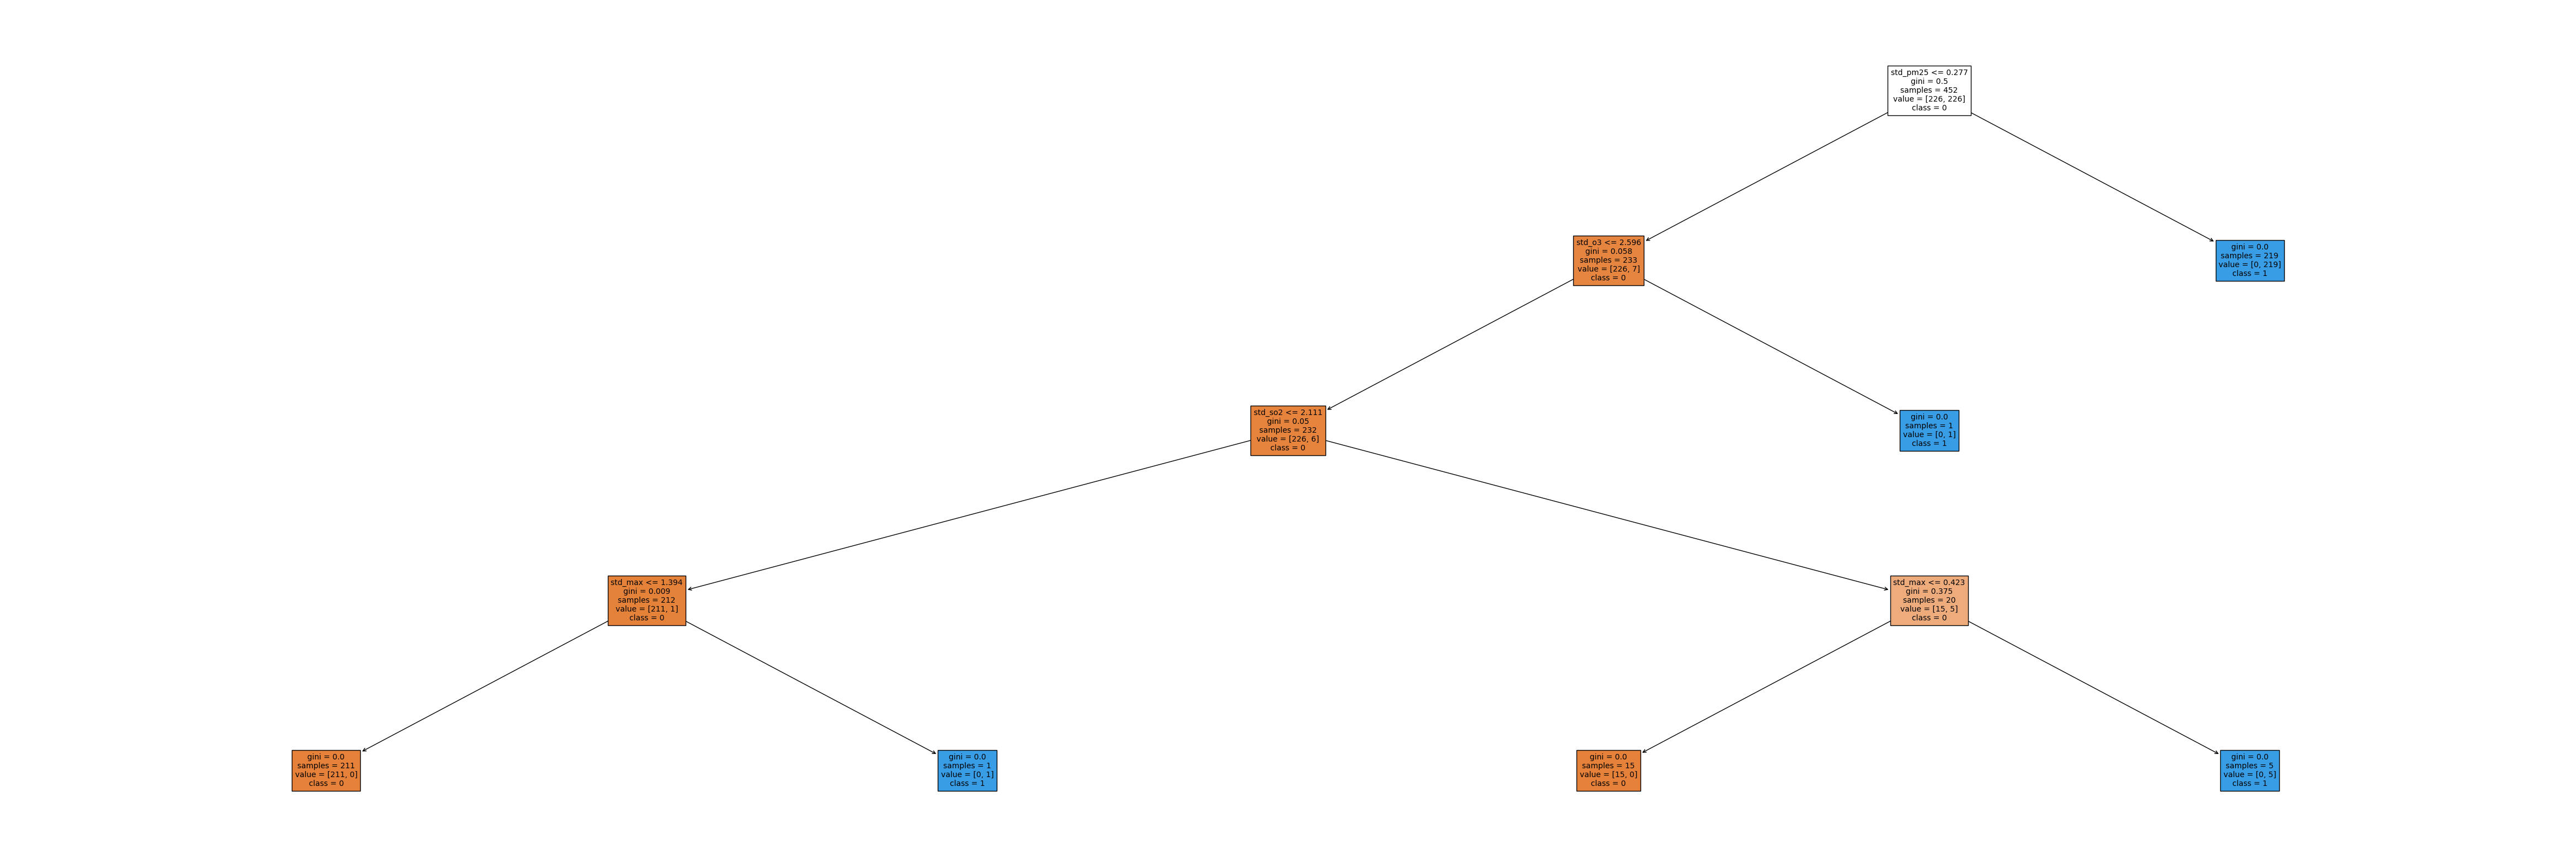

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(60, 20))
tree.plot_tree(model.best_estimator_,
               feature_names = X.columns.tolist(),
               class_names=['0','1'],
               filled = True, max_depth=5, fontsize=10)
plt.show()

In [ ]:
print('Train score: ' + str(model.score(X_over_SMOTE, y_over_SMOTE))) #recall
print('Test score:' + str(model.score(X_test, y_test))) #recall

Train score: 1.0
Test score:1.0


Text(0.5, 1.0, 'feature importance score')

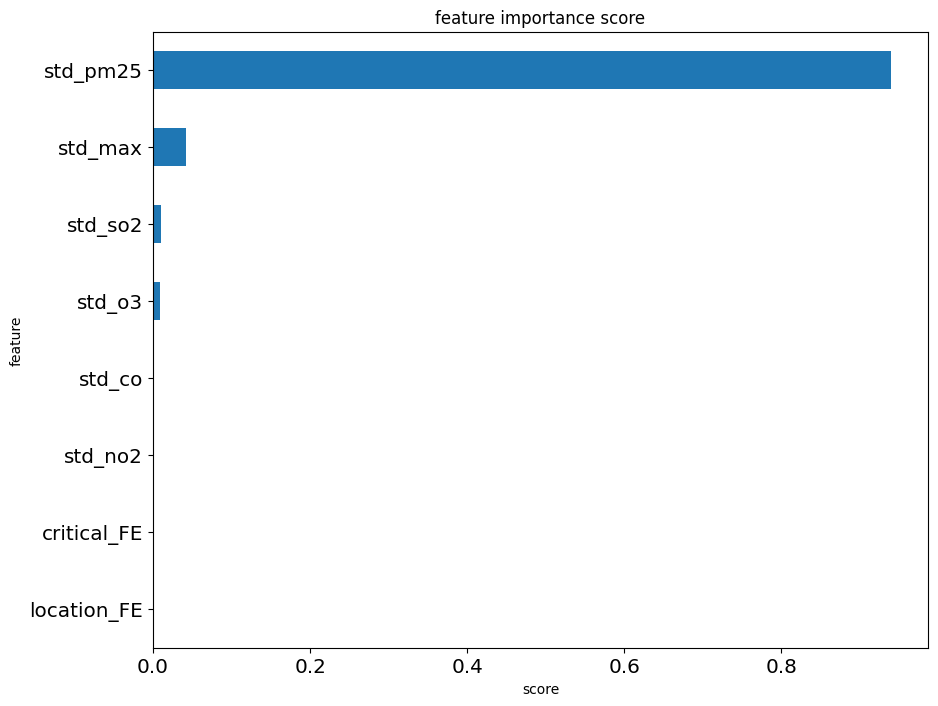

In [ ]:
# plt.figsize(10, 8)
feat_importances = pd.Series(model.best_estimator_.feature_importances_, index=X.columns)
ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
ax.invert_yaxis()

plt.xlabel('score')
plt.ylabel('feature')
plt.title('feature importance score')

#### Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_over_SMOTE,y_over_SMOTE)

y_pred = rf.predict(X_test)
eval_classification(rf, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[68,  0],
       [ 0, 42]])

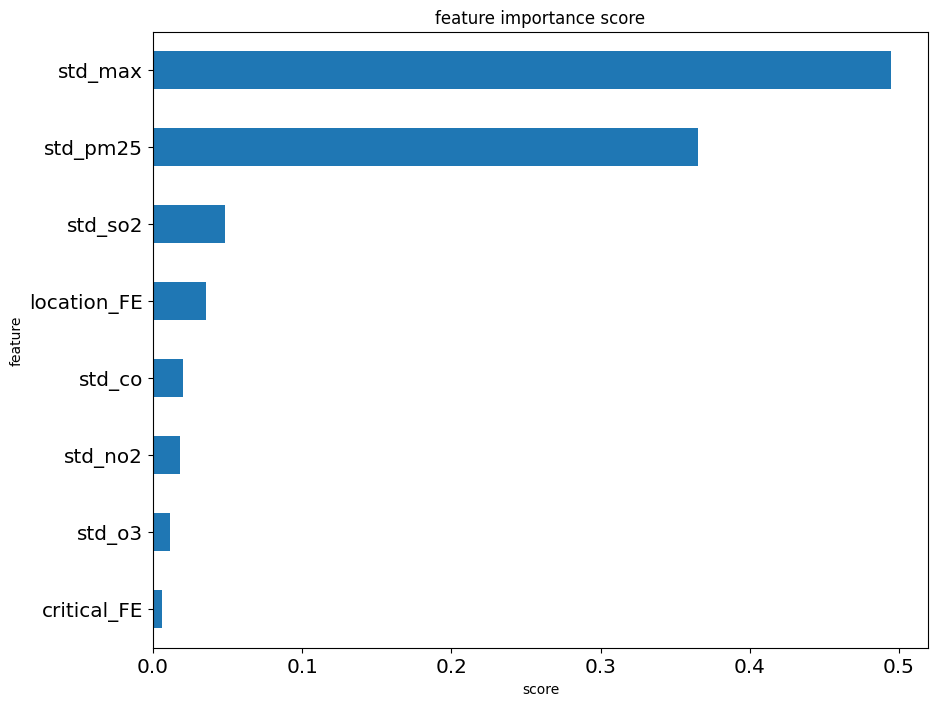

In [ ]:
show_feature_importance(rf)

Hyperparameter tuning with RandomizedSearch

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')
rf_tuned.fit(X_over_SMOTE,y_over_SMOTE)

# Predict & Evaluation
y_pred = rf_tuned.predict(X_test)#Check performa dari model
eval_classification(rf_tuned, y_pred, X_over_SMOTE, y_over_SMOTE, X_test, y_test)

Accuracy (Test Set): 1.00
Precision (Test Set): 1.00
Recall (Test Set): 1.00
F1-Score (Test Set): 1.00
AUC: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred, y_test)

array([[68,  0],
       [ 0, 42]])

In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 100
Best bootstrap: True
Best criterion: gini
Best max_depth: 10
Best min_samples_split: 8
Best min_samples_leaf: 7
Best max_features: sqrt
Best n_jobs: -1


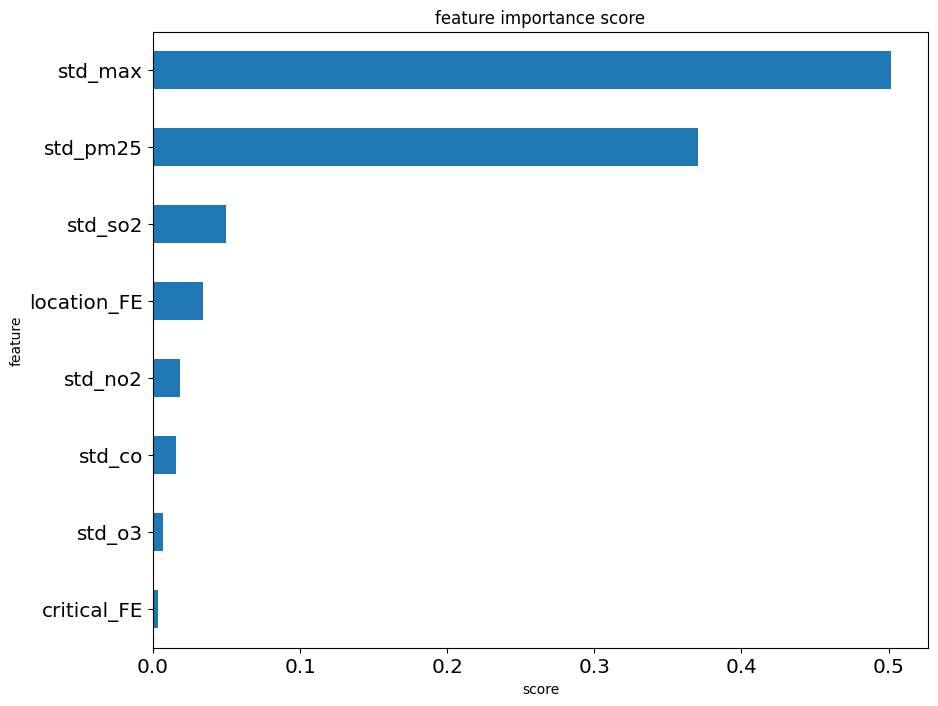

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

# KESIMPULAN DARI MODEL :
- Model yang sudah best fit adalah Decision tree dengan tuning hyperparameter. score Precision (Test Set): 0.90 dan Recall (Test Set): 0.86. Model ini dapat digunakan sebagai model machine learning untuk bisnis kita. Dengan prinsip FN dan FP sekecilnya-kecilnya.

# Insight & Recommendation